# Signal as a function of creation @ 1300 nm - fixed inducing

In [1]:
import numpy as np

In [2]:
inducing = 1300 * np.ones(100)

In [3]:
inducing.shape

(100,)

In [4]:
inducing

array([ 1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,  1300.,
        1300.,  1300.,  1300.,  1300.])

In [5]:
creation = np.arange(400, 1400, 10)

In [6]:
creation.shape

(100,)

In [7]:
creation

array([ 400,  410,  420,  430,  440,  450,  460,  470,  480,  490,  500,
        510,  520,  530,  540,  550,  560,  570,  580,  590,  600,  610,
        620,  630,  640,  650,  660,  670,  680,  690,  700,  710,  720,
        730,  740,  750,  760,  770,  780,  790,  800,  810,  820,  830,
        840,  850,  860,  870,  880,  890,  900,  910,  920,  930,  940,
        950,  960,  970,  980,  990, 1000, 1010, 1020, 1030, 1040, 1050,
       1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160,
       1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270,
       1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380,
       1390])

In [8]:
signal = (inducing * creation / 2) / (inducing - creation / 2)

In [9]:
signal.shape

(100,)

In [10]:
signal

array([  236.36363636,   243.37899543,   250.4587156 ,   257.60368664,
         264.81481481,   272.09302326,   279.43925234,   286.85446009,
         294.33962264,   301.8957346 ,   309.52380952,   317.22488038,
         325.        ,   332.85024155,   340.77669903,   348.7804878 ,
         356.8627451 ,   365.02463054,   373.26732673,   381.5920398 ,
         390.        ,   398.49246231,   407.07070707,   415.73604061,
         424.48979592,   433.33333333,   442.26804124,   451.29533679,
         460.41666667,   469.63350785,   478.94736842,   488.35978836,
         497.87234043,   507.48663102,   517.20430108,   527.02702703,
         536.95652174,   546.99453552,   557.14285714,   567.40331492,
         577.77777778,   588.26815642,   598.87640449,   609.60451977,
         620.45454545,   631.42857143,   642.52873563,   653.75722543,
         665.11627907,   676.60818713,   688.23529412,   700.        ,
         711.9047619 ,   723.95209581,   736.14457831,   748.48484848,
      

In [11]:
# display plots in the notebook
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [13]:
# larger figures
plt.rcParams["figure.figsize"] = (8,6)

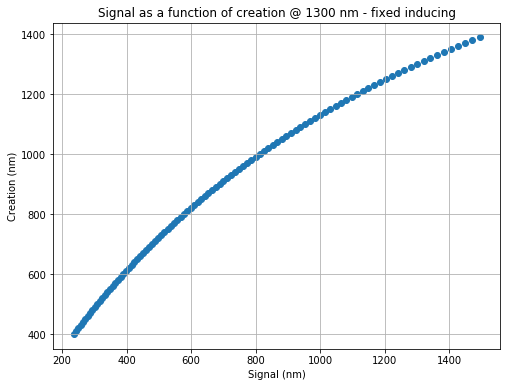

In [14]:
plt.scatter(signal, creation)
plt.xlabel('Signal (nm)')
plt.ylabel('Creation (nm)')
plt.title('Signal as a function of creation @ 1300 nm - fixed inducing')
plt.grid()

# Signal as a function of creation @ 1064 nm - fixed inducing

Let's now create
a function which takes the inducing wavelength as an input
parameter and returns
the `creation` and `signal`.

In [15]:
def creation_vs_signal(ind_lambda, points=100):
    inducing = ind_lambda * np.ones(points)
    creation = np.linspace(400, 1390, points)
    c_2 = creation / 2
    signal = (inducing * c_2) / (inducing - c_2)
    return signal, creation, ind_lambda

And another function that takes the output from `creation_vs_signal` and plots
it.

In [16]:
def plot_creation_vs_signal(sig, cre, ind_lambda):
    plt.scatter(sig, cre)
    plt.xlabel('Signal (nm)')
    plt.ylabel('Creation (nm)')
    plt.title('Signal as a function of creation @ {} nm - fixed inducing'.format(ind_lambda))
    plt.grid()

We put the two functions together and do the plot @ 1064 nm.

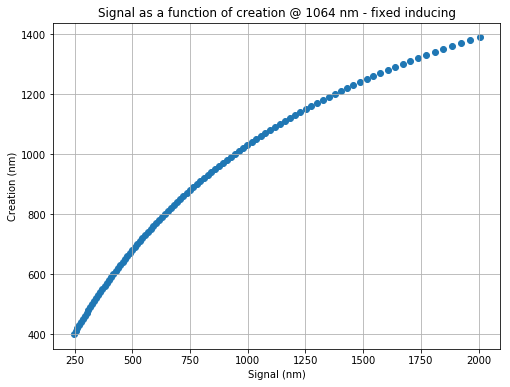

In [17]:
s, c, l = creation_vs_signal(1064)
plot_creation_vs_signal(s, c, l)

# We now want to plot both on the same graph.

In [18]:
s1, c1, l1 = creation_vs_signal(1300)
s2, c2, l2 = creation_vs_signal(1064)

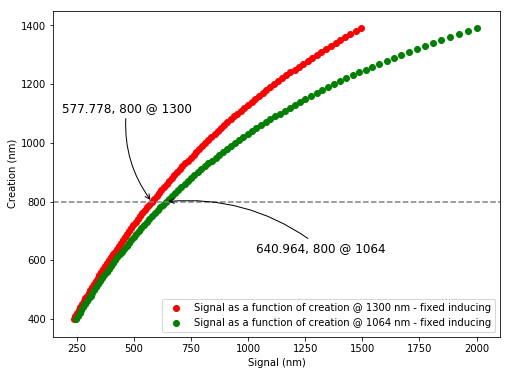

In [19]:
plt.scatter(s1, c1, color='red', label='Signal as a function of creation @ {} nm - fixed inducing'.format(l1))
plt.scatter(s2, c2, color='green', label='Signal as a function of creation @ {} nm - fixed inducing'.format(l2))

plt.xlabel('Signal (nm)')
plt.ylabel('Creation (nm)')
plt.legend()

# let's add some fancy annotations

# what the signal value when creation = 800 nm?
wvlen = 800
plt.axhline(y=wvlen, ls='--', color='0.5')
idx = np.where(c1 == wvlen)
val = s1[idx]

plt.annotate('{:07.3f}, {} @ {}'.format(val[0], wvlen, l1),
             xy=(val, wvlen), xycoords='data',
             xytext=(-90, 90), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# and now for 1064
idx = np.where(c2 == wvlen)
val = s2[idx]
plt.annotate('{:07.3f}, {} @ {}'.format(val[0], wvlen, l2),
             xy=(val, wvlen), xycoords='data',
             xytext=(90, -50), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"));

In [20]:
s1[np.where(c1 == 800)]

array([ 577.77777778])